##Importar Datos

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("petrol_consumption.csv")

In [6]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


##Separar Data

In [0]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=5)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (38, 4)
X_test shape: (10, 4)


##Estandarizar Datos

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.score(X_train,y_train)

0.6752024263880673

In [12]:
reg.score(X_test,y_test)

0.630063753508751

##Visualizando

In [13]:
X_train

,0,1,2,3
0,0.465736,0.223378,-1.455308,-0.559244
1,-0.580244,-1.763142,0.248201,-1.140187
2,1.511717,-1.319622,-1.028256,-0.915306
3,1.511717,-1.040093,-0.262603,-0.559244
4,2.557697,1.980684,-1.205987,-0.053261
5,-0.580244,0.031435,-0.445862,0.921224
6,-0.057254,-1.718417,-0.435359,-0.503024
7,-0.580244,-1.161223,-0.472950,-0.203182
8,0.988727,0.549495,-0.850525,-0.428063
9,0.465736,-0.169826,0.077104,-0.203182


In [14]:
pd.DataFrame(zip(X.columns,reg.coef_),columns=['Columnas','coeficientes'])

,Columnas,coeficientes
0,Petrol_tax,-27.159789
1,Average_income,-37.453452
2,Paved_Highways,-7.237616
3,Population_Driver_licence(%),80.479724


In [15]:
reg.intercept_

583.7368421052632

In [0]:
import matplotlib.pyplot as plt

In [0]:
y_predict = reg.predict(X_train)

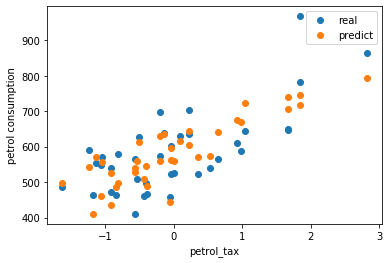

In [21]:
plt.plot(X_train[3], y_train, 'o', label='real')
plt.plot(X_train[3],y_predict,'o',label='predict')
plt.xlabel("petrol_tax")
plt.ylabel("petrol consumption")
plt.legend()
plt.show()